<a href="https://colab.research.google.com/github/DanielWarfield1/MLWritingAndResearch/blob/main/SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
connection = sqlite3.connect("tutorial.db")
cursor = connection.cursor()

In [ ]:
cursor.execute("""

CREATE TABLE movie(title, year, score)

""")

In [ ]:
cursor.execute("""

INSERT INTO movie VALUES
    ('Monty Python and the Holy Grail', 1975, 8.2),
    ('And Now for Something Completely Different', 1971, 7.5)

""")
connection.commit()

In [ ]:
res = cursor.execute("""

SELECT score FROM movie

""")
res.fetchall()

[(8.2,), (7.5,)]

# Making a Helper Function

In [16]:
import sqlite3
from IPython.display import Markdown, display

def display_table(table_name):

    # Getting all the content from a table
    cursor.execute(f"""

    SELECT * FROM {table_name}

    """)
    rows = cursor.fetchall()
    columns = [description[0] for description in cursor.description]

    # Building a markdown table
    md = "| " + " | ".join(columns) + " |\n"
    md += "| " + " | ".join(["---"] * len(columns)) + " |\n"
    for row in rows:
        md += "| " + " | ".join(str(cell) for cell in row) + " |\n"

    # Displaying in Markdown format
    display(Markdown(md))


# display_table('movie')

In [17]:
from tabulate import tabulate

def display_results(cursor, results):

    # Get column names from cursor.description
    columns = [desc[0] for desc in cursor.description]

    # Render Markdown table
    display(Markdown((tabulate(results, headers=columns, tablefmt="github"))))

# Schema Rendering

In [ ]:
!pip install eralchemy

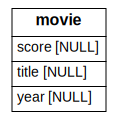

In [ ]:
from sqlalchemy import create_engine, MetaData
from eralchemy import render_er

# Replace 'your_database.db' with the actual path to your SQLite database file
engine = create_engine('sqlite:///tutorial.db')
metadata = MetaData()
metadata.reflect(bind=engine)

# Render the schema to a file named 'erd_from_sqlite.png'
render_er(metadata, 'erd_from_sqlite.png')

# Creating a Schema

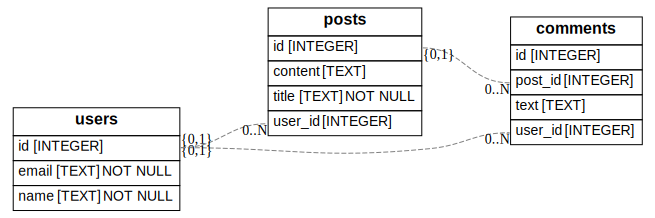

In [ ]:
import sqlite3
from sqlalchemy import create_engine, MetaData
from eralchemy import render_er

# Step 1: Create SQLite DB and execute raw SQL to define schema
connection = sqlite3.connect("schema_tutorial.db")
cursor = connection.cursor()

cursor.executescript("""
DROP TABLE IF EXISTS comments;
DROP TABLE IF EXISTS posts;
DROP TABLE IF EXISTS users;

CREATE TABLE users (
    id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    email TEXT UNIQUE NOT NULL
);

CREATE TABLE posts (
    id INTEGER PRIMARY KEY,
    title TEXT NOT NULL,
    content TEXT,
    user_id INTEGER,
    FOREIGN KEY (user_id) REFERENCES users(id)
);

CREATE TABLE comments (
    id INTEGER PRIMARY KEY,
    text TEXT,
    post_id INTEGER,
    user_id INTEGER,
    FOREIGN KEY (post_id) REFERENCES posts(id),
    FOREIGN KEY (user_id) REFERENCES users(id)
);
""")

connection.commit()
connection.close()

# Step 2: Reflect schema with SQLAlchemy
engine = create_engine('sqlite:///schema_tutorial.db')
metadata = MetaData()
metadata.reflect(bind=engine)

# Step 3: Render ER diagram
render_er(metadata, 'erd_from_sqlite.png')

In [ ]:
connection = sqlite3.connect("schema_tutorial.db")
cursor = connection.cursor()
display_table('posts')

| id | title | content | user_id |
| --- | --- | --- | --- |


# Example 1) Basic Database

## Creating a Database

In [ ]:
import sqlite3
connection = sqlite3.connect("example_database_1.db")
cursor = connection.cursor()

## Creating a Table

In [ ]:
cursor.execute("""

CREATE TABLE People(first_name, last_name, age, favorite_color)

""")

## Adding Records

In [ ]:
cursor.execute("""

INSERT INTO People
VALUES
    ('Tom', 'Sawyer', 19, 'White'),
    ('Mel', 'Gibson', 69, 'Green'),
    ('Daniel', 'Warfiled', 27, 'Yellow')

""")
connection.commit()

## Getting Table Content

In [ ]:
cursor.execute(f"""

SELECT * FROM People

""")
results = cursor.fetchall()

display_results(cursor, results)

| first_name   | last_name   |   age | favorite_color   |
|--------------|-------------|-------|------------------|
| Tom          | Sawyer      |    19 | White            |
| Mel          | Gibson      |    69 | Green            |
| Daniel       | Warfiled    |    27 | Yellow           |

In [ ]:
cursor.execute(f"""

SELECT first_name, favorite_color FROM People

""")
results = cursor.fetchall()

display_results(cursor, results)

| first_name   | favorite_color   |
|--------------|------------------|
| Tom          | White            |
| Mel          | Green            |
| Daniel       | Yellow           |

## Making a Helper Function to Render Tables Better

In [ ]:
import sqlite3
from IPython.display import Markdown, display

def display_table(cursor, table_name):

    # Getting all the content from a table
    cursor.execute(f"""

    SELECT * FROM {table_name}

    """)
    rows = cursor.fetchall()
    columns = [description[0] for description in cursor.description]

    # Building a markdown table
    md = "| " + " | ".join(columns) + " |\n"
    md += "| " + " | ".join(["---"] * len(columns)) + " |\n"
    for row in rows:
        md += "| " + " | ".join(str(cell) for cell in row) + " |\n"

    # Displaying in Markdown format
    display(Markdown(md))


# display_table(cursor, "People")

## Adding a Person, with a Null value

In [ ]:
cursor.execute("""

INSERT INTO People
VALUES
    ('Tom', 'Bombadill', NULL, 'Yellow')

""")
connection.commit()

In [ ]:
display_table("People")

| first_name | last_name | age | favorite_color |
| --- | --- | --- | --- |
| Tom | Sawyer | 19 | White |
| Mel | Gibson | 69 | Green |
| Daniel | Warfiled | 27 | Yellow |
| Tom | Bombadill | None | Yellow |


# Example 2) Basic Selection and Filtering

## Creating with an auto incrementing primary key

In [ ]:
import sqlite3
connection = sqlite3.connect("example_database_2.db")
cursor = connection.cursor()

In [ ]:
cursor.execute("""

CREATE TABLE People(
    id INTEGER PRIMARY KEY,
    first_name TEXT,
    last_name TEXT,
    age INTEGER,
    favorite_color TEXT
)

""")

In [ ]:
cursor.execute("""

INSERT INTO People
VALUES
    (NULL, 'Tom', 'Sawyer', 19, 'White'),
    (NULL, 'Mel', 'Gibson', 69, 'Green'),
    (NULL, 'Daniel', 'Warfiled', 27, 'Yellow')

""")
connection.commit()

In [ ]:
display_table(cursor, "People")

| id | first_name | last_name | age | favorite_color |
| --- | --- | --- | --- | --- |
| 1 | Tom | Sawyer | 19 | White |
| 2 | Mel | Gibson | 69 | Green |
| 3 | Daniel | Warfiled | 27 | Yellow |


## Type Conflict

In [ ]:
cursor.execute("""

INSERT INTO People
VALUES
    (NULL, 3, 3, 'hello', 3)

""")
connection.commit()

display_table(cursor, "People")

| id | first_name | last_name | age | favorite_color |
| --- | --- | --- | --- | --- |
| 1 | Tom | Sawyer | 19 | White |
| 2 | Mel | Gibson | 69 | Green |
| 3 | Daniel | Warfiled | 27 | Yellow |
| 4 | 3 | 3 | hello | 3 |


## Getting Individual Item

In [ ]:
cursor.execute("""

SELECT * FROM People WHERE id = 3

""")
results = cursor.fetchall()
display_results(cursor, results)

|   id | first_name   | last_name   |   age | favorite_color   |
|------|--------------|-------------|-------|------------------|
|    3 | Daniel       | Warfiled    |    27 | Yellow           |

In [ ]:
cursor.execute("""

SELECT
*
FROM
People
WHERE
id
=
3

""")
row = cursor.fetchone()
print(row)

(3, 'Daniel', 'Warfiled', 27, 'Yellow')


## Getting all Items

In [ ]:
cursor.execute("""

SELECT * FROM People WHERE age > 20

""")
results = cursor.fetchall()
display_results(cursor, results)

|   id | first_name   | last_name   | age   | favorite_color   |
|------|--------------|-------------|-------|------------------|
|    2 | Mel          | Gibson      | 69    | Green            |
|    3 | Daniel       | Warfiled    | 27    | Yellow           |
|    4 | 3            | 3           | hello | 3                |

## Getting the first and last name of All People under 30

In [ ]:
cursor.execute("""

SELECT first_name, last_name FROM People WHERE age < 30

""")
results = cursor.fetchall()
display_results(cursor, results)

| first_name   | last_name   |
|--------------|-------------|
| Tom          | Sawyer      |
| Daniel       | Warfiled    |

# Example 3) Creation and Deletion

## Creating DB

In [ ]:
import sqlite3
connection = sqlite3.connect("example_database_3.db")
cursor = connection.cursor()

In [ ]:
cursor.execute("""

CREATE TABLE People(
    id INTEGER PRIMARY KEY,
    first_name TEXT,
    last_name TEXT,
    age INTEGER,
    favorite_color TEXT
)

""")

In [ ]:
cursor.execute("""

INSERT INTO People
VALUES
    (NULL, 'Tom', 'Sawyer', 19, 'White'),
    (NULL, 'Mel', 'Gibson', 69, 'Green'),
    (NULL, 'Daniel', 'Warfiled', 27, 'Yellow')

""")
connection.commit()

In [ ]:
display_table(cursor, "People")

| id | first_name | last_name | age | favorite_color |
| --- | --- | --- | --- | --- |
| 1 | Tom | Sawyer | 19 | White |
| 2 | Mel | Gibson | 69 | Green |
| 3 | Daniel | Warfiled | 27 | Yellow |


# Deleting all People under the age of 30

In [ ]:
cursor.execute("""

DELETE FROM People WHERE age < 30

""")
connection.commit()

display_table(cursor, "People")

| id | first_name | last_name | age | favorite_color |
| --- | --- | --- | --- | --- |
| 2 | Mel | Gibson | 69 | Green |


## Deleting the Table

In [ ]:
# Drop the table
cursor.execute("""

DROP TABLE IF EXISTS People

""")
connection.commit()

In [ ]:
display_table(cursor, "People")

OperationalError: no such table: People

# Example 4) Primary and Foreign Keys

In [ ]:
import sqlite3
connection = sqlite3.connect("example_database_4.db")
cursor = connection.cursor()

In [ ]:
cursor.executescript("""

CREATE TABLE Users(
    id INTEGER PRIMARY KEY,
    username TEXT
);

CREATE TABLE Comments(
    id INTEGER PRIMARY KEY,
    comment TEXT,
    user_id INTEGER,
    FOREIGN KEY (user_id) REFERENCES Users(id)
)

""")

In [ ]:
cursor.executescript("""

INSERT INTO Users (id, username) VALUES
    (NULL, 'alice'),
    (NULL, 'bob'),
    (NULL, 'charlie');

INSERT INTO Comments (id, comment, user_id) VALUES
    (NULL, 'Hello world!', 1),
    (NULL, 'Nice to meet you.', 1),
    (NULL, 'This is a comment.', 2),
    (NULL, 'Another one here.', 3),
    (NULL, 'Final test comment.', 3);

""")

connection.commit()

In [ ]:
print('Users:')
display_table(cursor, "Users")

print('\nComments:')
display_table(cursor, "Comments")

Users:


| id | username |
| --- | --- |
| 1 | alice |
| 2 | bob |
| 3 | charlie |
| 4 | alice |
| 5 | bob |
| 6 | charlie |



Comments:


| id | comment | user_id |
| --- | --- | --- |
| 1 | Hello world! | 1 |
| 2 | Nice to meet you. | 1 |
| 3 | This is a comment. | 2 |
| 4 | Another one here. | 3 |
| 5 | Final test comment. | 3 |
| 6 | Hello world! | 1 |
| 7 | Nice to meet you. | 1 |
| 8 | This is a comment. | 2 |
| 9 | Another one here. | 3 |
| 10 | Final test comment. | 3 |


## Drawing Entity Relationship Diagram

In [ ]:
!pip install eralchemy

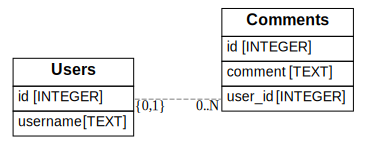

In [ ]:
from sqlalchemy import create_engine, MetaData
from eralchemy import render_er

# Step 2: Reflect schema with SQLAlchemy
engine = create_engine('sqlite:///example_database_4.db')
metadata = MetaData()
metadata.reflect(bind=engine)

# Step 3: Render ER diagram
render_er(metadata, 'example_database_4.png')

## Example 5) Joins

In [ ]:
import sqlite3
connection = sqlite3.connect("example_database_5.db")
cursor = connection.cursor()

In [ ]:
cursor.executescript("""

CREATE TABLE Users(
    id INTEGER PRIMARY KEY,
    username TEXT
);

CREATE TABLE Comments(
    id INTEGER PRIMARY KEY,
    comment TEXT,
    user_id INTEGER,
    FOREIGN KEY (user_id) REFERENCES Users(id)
);

INSERT INTO Users (id, username) VALUES
    (NULL, 'alice'),
    (NULL, 'bob'),
    (NULL, 'charlie'),
    (NULL, 'quiet guy');

INSERT INTO Comments (id, comment, user_id) VALUES
    (NULL, 'Hello world!', 1),
    (NULL, 'Nice to meet you.', 1),
    (NULL, 'This is a comment.', 2),
    (NULL, 'Another one here.', 3),
    (NULL, 'Final test comment.', 3),
    (NULL, 'Ghost Comment', NULL);

""")
connection.commit()

In [ ]:
print('Users:')
display_table(cursor, "Users")
print('\nComments:')
display_table(cursor, "Comments")

Users:


| id | username |
| --- | --- |
| 1 | alice |
| 2 | bob |
| 3 | charlie |
| 4 | quiet guy |



Comments:


| id | comment | user_id |
| --- | --- | --- |
| 1 | Hello world! | 1 |
| 2 | Nice to meet you. | 1 |
| 3 | This is a comment. | 2 |
| 4 | Another one here. | 3 |
| 5 | Final test comment. | 3 |
| 6 | Ghost Comment | None |


In [ ]:
cursor.execute("""

SELECT
    Users.username,
    Comments.comment
FROM Comments
JOIN Users ON Comments.user_id = Users.id

""")

results = cursor.fetchall()
display_results(cursor, results)

| username   | comment             |
|------------|---------------------|
| alice      | Hello world!        |
| alice      | Nice to meet you.   |
| bob        | This is a comment.  |
| charlie    | Another one here.   |
| charlie    | Final test comment. |

In [ ]:
cursor.execute("""

SELECT
    Users.username,
    Comments.comment
FROM Users
LEFT JOIN Comments ON Users.id = Comments.user_id

""")

results = cursor.fetchall()
display_results(cursor, results)

| username   | comment             |
|------------|---------------------|
| alice      | Hello world!        |
| alice      | Nice to meet you.   |
| bob        | This is a comment.  |
| charlie    | Another one here.   |
| charlie    | Final test comment. |
| quiet guy  |                     |

In [ ]:
# The version of SQLite I'm using doesn't support
# right join, but we can get the same effect by swapping
# which table we're joining on

cursor.execute("""

SELECT
    Users.username,
    Comments.comment
FROM Comments
LEFT JOIN Users ON Users.id = Comments.user_id

""")

results = cursor.fetchall()
display_results(cursor, results)

| username   | comment             |
|------------|---------------------|
| alice      | Hello world!        |
| alice      | Nice to meet you.   |
| bob        | This is a comment.  |
| charlie    | Another one here.   |
| charlie    | Final test comment. |
|            | Ghost Comment       |

In [ ]:
# sqlite also doesn't support outer joins, but we can get that
# by combining two left joins where the second is filtered by what
# the first one left out. We'll get into unions and where statements later
# I just wanted to show off the concept of an outer join

cursor.execute("""

SELECT
    Comments.comment,
    Users.username
FROM Comments
LEFT JOIN Users ON Comments.user_id = Users.id

UNION

SELECT
    Comments.comment,
    Users.username
FROM Users
LEFT JOIN Comments ON Users.id = Comments.user_id
WHERE Comments.user_id IS NULL

""")

results = cursor.fetchall()
display_results(cursor, results)


| comment             | username   |
|---------------------|------------|
|                     | quiet guy  |
| Another one here.   | charlie    |
| Final test comment. | charlie    |
| Ghost Comment       |            |
| Hello world!        | alice      |
| Nice to meet you.   | alice      |
| This is a comment.  | bob        |

## Example 6) filtration

In [ ]:
#using the same DB as the previous example
import sqlite3
connection = sqlite3.connect("example_database_5.db")
cursor = connection.cursor()

In [ ]:
print('Original Users Table:')
display_table(cursor, "Users")

#filtering by user id using WHERE

cursor.execute("""

SELECT * FROM Users
WHERE id = 2

""")

results = cursor.fetchall()
print('\nFiltered Users Table:')
display_results(cursor, results)

Original Users Table:


| id | username |
| --- | --- |
| 1 | alice |
| 2 | bob |
| 3 | charlie |
| 4 | quiet guy |



Filtered Users Table:


|   id | username   |
|------|------------|
|    2 | bob        |

# Example 7) More Filtration and Limiting

In [ ]:
import sqlite3
import random
import string

# Connect to an in-memory SQLite database
connection = sqlite3.connect("example_database_7.db")
cursor = connection.cursor()

# Create the employees table
cursor.execute("""
CREATE TABLE employees (
    id INTEGER PRIMARY KEY,
    name TEXT,
    department TEXT,
    age INTEGER,
    salary REAL,
    full_time BOOLEAN
)
""")

# Generate random data
departments = ['Engineering', 'Sales', 'HR', 'Marketing', 'Support']
def random_name():
    return ''.join(random.choices(string.ascii_uppercase, k=1)) + ''.join(random.choices(string.ascii_lowercase, k=6))

data = [
    (
        i,
        random_name(),
        random.choice(departments),
        random.randint(20, 65),
        round(random.uniform(40000, 120000), 2),
        random.choice([0, 1])
    )
    for i in range(1, 50)
]

# Insert data into the table
cursor.executemany("INSERT INTO employees VALUES (?, ?, ?, ?, ?, ?)", data)
connection.commit()

print('Original Users Table:')
display_table(cursor, "employees")

# Various filtering examples using SQL WHERE clauses

print("\nEmployees in Engineering under age 30:")
results = cursor.execute("SELECT * FROM employees WHERE department = 'Engineering' AND age < 30 LIMIT 5")
display_results(cursor, results)

print("\nHigh earners (salary > 100000):")
results = cursor.execute("SELECT id, name, salary FROM employees WHERE salary > 100000 LIMIT 5")
display_results(cursor, results)

print("\nPart-time employees in Sales:")
results = cursor.execute("SELECT * FROM employees WHERE department = 'Sales' AND full_time = 0 LIMIT 5")
display_results(cursor, results)

print("\nEmployees with names starting with 'A':")
results = cursor.execute("SELECT id, name FROM employees WHERE name LIKE 'A%' LIMIT 5")
display_results(cursor, results)

print("\nEmployees aged between 30 and 40:")
results = cursor.execute("SELECT id, name, age FROM employees WHERE age BETWEEN 30 AND 40 LIMIT 5")
display_results(cursor, results)


Original Users Table:


| id | name | department | age | salary | full_time |
| --- | --- | --- | --- | --- | --- |
| 1 | Ruribms | Sales | 52 | 91908.53 | 0 |
| 2 | Mwlymav | Support | 49 | 97663.29 | 1 |
| 3 | Egfppih | Engineering | 54 | 58859.45 | 0 |
| 4 | Iaxswuy | Engineering | 49 | 71957.69 | 0 |
| 5 | Drrdyye | Marketing | 41 | 87556.73 | 1 |
| 6 | Udhogph | Engineering | 50 | 108528.47 | 0 |
| 7 | Obzapaa | Sales | 21 | 93981.28 | 0 |
| 8 | Cthbakt | Support | 32 | 74465.6 | 1 |
| 9 | Xwsioxu | HR | 24 | 59701.0 | 1 |
| 10 | Pvvikkh | Sales | 48 | 64224.68 | 1 |
| 11 | Gxuwhpx | Sales | 63 | 55109.61 | 1 |
| 12 | Vcocfvb | Sales | 65 | 47398.3 | 1 |
| 13 | Tapbfgy | HR | 31 | 50773.11 | 0 |
| 14 | Avlppww | Sales | 32 | 67188.34 | 1 |
| 15 | Dlwyahd | Sales | 64 | 91394.82 | 0 |
| 16 | Zhlxpup | Marketing | 38 | 54280.37 | 1 |
| 17 | Htieoyp | Engineering | 37 | 49554.7 | 0 |
| 18 | Vrjbibg | HR | 40 | 54707.65 | 0 |
| 19 | Lvyfenx | Marketing | 63 | 46704.47 | 0 |
| 20 | Favuoem | HR | 35 | 51799.59 | 1 |
| 21 | Zekzlxj | Support | 55 | 86358.14 | 0 |
| 22 | Pjficih | Marketing | 32 | 65402.65 | 0 |
| 23 | Kzcgyqx | HR | 20 | 96769.15 | 1 |
| 24 | Egvtkfo | Support | 36 | 104225.08 | 0 |
| 25 | Sddlvmx | Marketing | 40 | 99356.13 | 0 |
| 26 | Dylkldg | Support | 43 | 61540.76 | 1 |
| 27 | Cvywsxj | HR | 38 | 76197.74 | 0 |
| 28 | Wejvdqf | Marketing | 59 | 80082.6 | 0 |
| 29 | Uslkhpp | Marketing | 53 | 86401.75 | 0 |
| 30 | Hjnwpzr | Engineering | 50 | 58578.34 | 1 |
| 31 | Hzkjiab | Sales | 21 | 95801.03 | 0 |
| 32 | Drstpnw | Support | 38 | 62386.12 | 0 |
| 33 | Etxrklz | Marketing | 63 | 58765.07 | 1 |
| 34 | Ohhdflw | Marketing | 62 | 97005.57 | 1 |
| 35 | Edtldyv | HR | 58 | 75570.48 | 1 |
| 36 | Vnkuors | Engineering | 27 | 90695.46 | 0 |
| 37 | Kzktzpb | Engineering | 20 | 42323.11 | 0 |
| 38 | Occkpou | Support | 31 | 55941.97 | 0 |
| 39 | Crqbyne | Engineering | 26 | 116555.61 | 0 |
| 40 | Tcdnmna | Engineering | 52 | 53500.36 | 0 |
| 41 | Gcldgmn | Support | 33 | 106222.77 | 0 |
| 42 | Fqnpqkv | HR | 25 | 53296.12 | 1 |
| 43 | Syqgmhb | Marketing | 62 | 110897.02 | 0 |
| 44 | Cnharis | Engineering | 63 | 56145.58 | 1 |
| 45 | Obvieff | Marketing | 57 | 107147.99 | 1 |
| 46 | Kjgfbho | Support | 51 | 77654.46 | 0 |
| 47 | Sopqbxu | Sales | 20 | 76959.54 | 0 |
| 48 | Msgjxvi | Support | 24 | 50303.52 | 0 |
| 49 | Grifppx | Marketing | 61 | 41552.9 | 1 |



Employees in Engineering under age 30:


|   id | name    | department   |   age |   salary |   full_time |
|------|---------|--------------|-------|----------|-------------|
|   36 | Vnkuors | Engineering  |    27 |  90695.5 |           0 |
|   37 | Kzktzpb | Engineering  |    20 |  42323.1 |           0 |
|   39 | Crqbyne | Engineering  |    26 | 116556   |           0 |


High earners (salary > 100000):


|   id | name    |   salary |
|------|---------|----------|
|    6 | Udhogph |   108528 |
|   24 | Egvtkfo |   104225 |
|   39 | Crqbyne |   116556 |
|   41 | Gcldgmn |   106223 |
|   43 | Syqgmhb |   110897 |


Part-time employees in Sales:


|   id | name    | department   |   age |   salary |   full_time |
|------|---------|--------------|-------|----------|-------------|
|    1 | Ruribms | Sales        |    52 |  91908.5 |           0 |
|    7 | Obzapaa | Sales        |    21 |  93981.3 |           0 |
|   15 | Dlwyahd | Sales        |    64 |  91394.8 |           0 |
|   31 | Hzkjiab | Sales        |    21 |  95801   |           0 |
|   47 | Sopqbxu | Sales        |    20 |  76959.5 |           0 |


Employees with names starting with 'A':


|   id | name    |
|------|---------|
|   14 | Avlppww |


Employees aged between 30 and 40:


|   id | name    |   age |
|------|---------|-------|
|    8 | Cthbakt |    32 |
|   13 | Tapbfgy |    31 |
|   14 | Avlppww |    32 |
|   16 | Zhlxpup |    38 |
|   17 | Htieoyp |    37 |

# Example 8) Data Types

In [ ]:
# Connect to an in-memory SQLite database
connection = sqlite3.connect("example_database_8.db")
cursor = connection.cursor()

# Create a table showing off common SQL data types
cursor.execute("""
CREATE TABLE datatypes_demo (
    id INTEGER PRIMARY KEY,
    age INTEGER,                  -- Whole numbers
    height REAL,                  -- Decimal numbers
    name TEXT,                    -- Strings
    profile_picture BLOB,        -- Binary large object
    is_active NUMERIC,           -- Often used for BOOLEAN (0/1)
    created_at TEXT              -- ISO format date/time as TEXT
);
""")

# Insert one row using all types
cursor.execute("""
INSERT INTO datatypes_demo (age, height, name, profile_picture, is_active, created_at)
VALUES (
    30,                          -- INTEGER
    5.9,                         -- REAL
    'Alice Smith',              -- TEXT
    X'89504E470D0A1A0A',         -- BLOB (mock PNG header)
    1,                           -- NUMERIC as BOOLEAN (1 = True)
    '2025-04-05T15:30:00'        -- TEXT for date/time
);
""")

print('Datatype Table:')
display_table(cursor, "datatypes_demo")

Datatype Table:


| id | age | height | name | profile_picture | is_active | created_at |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 30 | 5.9 | Alice Smith | b'\x89PNG\r\n\x1a\n' | 1 | 2025-04-05T15:30:00 |


# Example 9) Distinct Selection

In [ ]:
import sqlite3

connection = sqlite3.connect("example_database_9")
cursor = connection.cursor()

# Create table and insert values — all SQL
cursor.executescript("""
-- Create a table of students with possible duplicate grades
CREATE TABLE students (
    id INTEGER PRIMARY KEY,
    name TEXT,
    grade TEXT
);

-- Insert values (some duplicate grades)
INSERT INTO students (name, grade) VALUES
  ('Alice', 'A'),
  ('Alice', 'A'),
  ('Alice', 'D'),
  ('Bob', 'B'),
  ('Charlie', 'A'),
  ('Diana', 'C'),
  ('Ethan', 'B');
""")

print("All grades (including duplicates):")
results = cursor.execute("SELECT grade FROM students")
display_results(cursor, results)

print("\nDistinct grades (duplicate grades removed):")
results = cursor.execute("SELECT DISTINCT grade FROM students")
display_results(cursor, results)


All grades (including duplicates):


| grade   |
|---------|
| A       |
| A       |
| D       |
| B       |
| A       |
| C       |
| B       |


Distinct grades (duplicate grades removed):


| grade   |
|---------|
| A       |
| D       |
| B       |
| C       |

In [ ]:
print("\nDistinct combinations of name and grade:")
results = cursor.execute("SELECT DISTINCT name, grade FROM students")
display_results(cursor, results)


Distinct combinations of name and grade:


| name    | grade   |
|---------|---------|
| Alice   | A       |
| Alice   | D       |
| Bob     | B       |
| Charlie | A       |
| Diana   | C       |
| Ethan   | B       |

# Example 9) Grouping



In [ ]:
results = cursor.execute("""

SELECT grade, MIN(name) AS example_name
FROM students
GROUP BY grade;

""")
display_results(cursor, results)

| grade   | example_name   |
|---------|----------------|
| A       | Alice          |
| B       | Bob            |
| C       | Diana          |
| D       | Alice          |

# Example 10) More in-depth Group By

In [ ]:
import sqlite3

connection = sqlite3.connect("example_database_10")
cursor = connection.cursor()

cursor.executescript("""
-- Create a table of employees
CREATE TABLE employees (
    id INTEGER PRIMARY KEY,
    name TEXT,
    department TEXT,
    role TEXT,
    location TEXT,
    salary REAL,
    hire_date TEXT  -- Stored as 'YYYY-MM-DD'
);

-- Insert sample data
INSERT INTO employees (name, department, role, location, salary, hire_date) VALUES
  ('Alice',   'Engineering', 'Developer', 'NY', 95000, '2020-06-15'),
  ('Bob',     'Engineering', 'Developer', 'NY', 92000, '2019-03-20'),
  ('Charlie', 'Engineering', 'Manager',   'SF', 120000, '2018-09-01'),
  ('Diana',   'Marketing',   'Analyst',   'NY', 70000, '2021-02-10'),
  ('Ethan',   'Marketing',   'Manager',   'SF', 105000, '2017-11-05'),
  ('Fay',     'Sales',       'Rep',       'TX', 65000, '2021-07-22'),
  ('Grace',   'Sales',       'Rep',       'TX', 64000, '2022-01-15'),
  ('Henry',   'Sales',       'Manager',   'NY', 99000, '2016-04-30');
""")


In [ ]:
display_table(cursor, 'employees')

| id | name | department | role | location | salary | hire_date |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | Alice | Engineering | Developer | NY | 95000.0 | 2020-06-15 |
| 2 | Bob | Engineering | Developer | NY | 92000.0 | 2019-03-20 |
| 3 | Charlie | Engineering | Manager | SF | 120000.0 | 2018-09-01 |
| 4 | Diana | Marketing | Analyst | NY | 70000.0 | 2021-02-10 |
| 5 | Ethan | Marketing | Manager | SF | 105000.0 | 2017-11-05 |
| 6 | Fay | Sales | Rep | TX | 65000.0 | 2021-07-22 |
| 7 | Grace | Sales | Rep | TX | 64000.0 | 2022-01-15 |
| 8 | Henry | Sales | Manager | NY | 99000.0 | 2016-04-30 |


In [ ]:
print('Average salary by department')
results = cursor.execute("""
SELECT department, AVG(salary) AS avg_salary
FROM employees
GROUP BY department;
""")
display_results(cursor, results)

Average salary by department


| department   |   avg_salary |
|--------------|--------------|
| Engineering  |       102333 |
| Marketing    |        87500 |
| Sales        |        76000 |

In [ ]:
print('Average salary by department')
results = cursor.execute("""
SELECT department, AVG(salary)
FROM Employees
GROUP BY department
HAVING AVG(salary) > 80000;
""")
display_results(cursor, results)

Average salary by department


| department   |   AVG(salary) |
|--------------|---------------|
| Engineering  |        102333 |
| Marketing    |         87500 |

In [ ]:
print('Number of employees per roll')
results = cursor.execute("""
SELECT role, COUNT(*) AS num_employees
FROM employees
GROUP BY role;
""")
display_results(cursor, results)

Number of employees per roll


| role      |   num_employees |
|-----------|-----------------|
| Analyst   |               1 |
| Developer |               2 |
| Manager   |               3 |
| Rep       |               2 |

In [ ]:
print('Total salary per location')
results = cursor.execute("""
SELECT location, SUM(salary) AS total_payroll
FROM employees
GROUP BY location;
""")
display_results(cursor, results)

Total salary per location


| location   |   total_payroll |
|------------|-----------------|
| NY         |          356000 |
| SF         |          225000 |
| TX         |          129000 |

In [ ]:
print('Yearly hires by department')
results = cursor.execute("""
SELECT department, SUBSTR(hire_date, 1, 4) AS hire_year, COUNT(*) AS hires
FROM employees
GROUP BY department, hire_year
ORDER BY hire_year;
""")
display_results(cursor, results)

Yearly hires by department


| department   |   hire_year |   hires |
|--------------|-------------|---------|
| Sales        |        2016 |       1 |
| Marketing    |        2017 |       1 |
| Engineering  |        2018 |       1 |
| Engineering  |        2019 |       1 |
| Engineering  |        2020 |       1 |
| Marketing    |        2021 |       1 |
| Sales        |        2021 |       1 |
| Sales        |        2022 |       1 |

In [ ]:
print("Departments with an average salary above $90,000:")
results = cursor.execute("""
SELECT department, AVG(salary) AS avg_salary
FROM employees
GROUP BY department
HAVING AVG(salary) > 90000;
""")
display_results(cursor, results)

Departments with an average salary above $90,000:


| department   |   avg_salary |
|--------------|--------------|
| Engineering  |       102333 |

# Example 11) Ordering and Limiting

In [ ]:
conn = sqlite3.connect("example_database_11")
cursor = conn.cursor()

# Create table and insert data again for a fresh run
cursor.executescript("""
CREATE TABLE employees (
    id INTEGER PRIMARY KEY,
    name TEXT,
    department TEXT,
    role TEXT,
    location TEXT,
    salary REAL,
    hire_date TEXT
);

INSERT INTO employees (name, department, role, location, salary, hire_date) VALUES
  ('Alice',   'Engineering', 'Developer', 'NY', 95000, '2020-06-15'),
  ('Bob',     'Engineering', 'Developer', 'NY', 92000, '2019-03-20'),
  ('Charlie', 'Engineering', 'Manager',   'SF', 120000, '2018-09-01'),
  ('Diana',   'Marketing',   'Analyst',   'NY', 70000, '2021-02-10'),
  ('Ethan',   'Marketing',   'Manager',   'SF', 105000, '2017-11-05'),
  ('Fay',     'Sales',       'Rep',       'TX', 65000, '2021-07-22'),
  ('Grace',   'Sales',       'Rep',       'TX', 64000, '2022-01-15'),
  ('Henry',   'Sales',       'Manager',   'NY', 99000, '2016-04-30');
""")


In [ ]:
print("Top 3 highest-paid employees:")
results = cursor.execute("""

SELECT name, salary
FROM employees
ORDER BY salary DESC
LIMIT 3;

""")

display_results(cursor, results)

Top 3 highest-paid employees:


| name    |   salary |
|---------|----------|
| Charlie |   120000 |
| Ethan   |   105000 |
| Henry   |    99000 |

In [ ]:
print("\n5 Most Recently Hired Employees:")
results = cursor.execute("""

SELECT name, hire_date
FROM employees
ORDER BY hire_date DESC
LIMIT 5;

""")

display_results(cursor, results)


5 Most Recently Hired Employees:


| name   | hire_date   |
|--------|-------------|
| Grace  | 2022-01-15  |
| Fay    | 2021-07-22  |
| Diana  | 2021-02-10  |
| Alice  | 2020-06-15  |
| Bob    | 2019-03-20  |

In [ ]:
print("Employees ranked #4–#6 by salary:")

results = cursor.execute("""

SELECT name, salary
FROM employees
ORDER BY salary DESC
LIMIT 3 OFFSET 3;

""")

display_results(cursor, results)

Employees ranked #4–#6 by salary:


| name   |   salary |
|--------|----------|
| Alice  |    95000 |
| Bob    |    92000 |
| Diana  |    70000 |

# Example 12) Updating and Deleting

In [ ]:
import sqlite3

# Create a new SQLite database
conn = sqlite3.connect("example_database_12.db")
cursor = conn.cursor()

# Create the table and insert sample data (pure SQL)
cursor.executescript("""
DROP TABLE IF EXISTS staff;

CREATE TABLE staff (
    id INTEGER PRIMARY KEY,
    name TEXT,
    role TEXT,
    department TEXT,
    salary REAL,
    hire_year INTEGER
);

-- Insert sample data
INSERT INTO staff (name, role, department, salary, hire_year) VALUES
  ('Alice', 'Developer', 'Engineering', 90000, 2020),
  ('Bob', 'Developer', 'Engineering', 87000, 2019),
  ('Charlie', 'Manager', 'Engineering', 110000, 2017),
  ('Diana', 'Analyst', 'Marketing', 65000, 2021),
  ('Ethan', 'Manager', 'Marketing', 95000, 2016),
  ('Fay', 'Rep', 'Sales', 60000, 2022),
  ('Grace', 'Rep', 'Sales', 61000, 2022);
""")


In [ ]:
display_table(cursor, 'staff')

| id | name | role | department | salary | hire_year |
| --- | --- | --- | --- | --- | --- |
| 1 | Alice | Developer | Engineering | 90000.0 | 2020 |
| 2 | Bob | Developer | Engineering | 87000.0 | 2019 |
| 3 | Charlie | Manager | Engineering | 110000.0 | 2017 |
| 4 | Diana | Analyst | Marketing | 65000.0 | 2021 |
| 5 | Ethan | Manager | Marketing | 95000.0 | 2016 |
| 6 | Fay | Rep | Sales | 60000.0 | 2022 |
| 7 | Grace | Rep | Sales | 61000.0 | 2022 |


In [ ]:
print("Before update:")
results = cursor.execute("SELECT name, salary FROM staff WHERE department = 'Sales';")
display_results(cursor, results)

cursor.execute("""
UPDATE staff
SET salary = salary + 5000
WHERE department = 'Sales' AND role = 'Rep';
""")
conn.commit()

print("\nAfter update:")
results = cursor.execute("SELECT name, salary FROM staff WHERE department = 'Sales';")
display_results(cursor, results)

Before update:


| name   |   salary |
|--------|----------|
| Fay    |    65000 |
| Grace  |    66000 |


After update:


| name   |   salary |
|--------|----------|
| Fay    |    70000 |
| Grace  |    71000 |

In [ ]:
print("\nBefore delete:")
results = cursor.execute("SELECT name, hire_year FROM staff ORDER BY hire_year;")
display_results(cursor, results)

cursor.execute("""
DELETE FROM staff
WHERE hire_year < 2018;
""")
conn.commit()

print("\nAfter delete:")
results = cursor.execute("SELECT name, hire_year FROM staff ORDER BY hire_year;")
display_results(cursor, results)


Before delete:


| name    |   hire_year |
|---------|-------------|
| Ethan   |        2016 |
| Charlie |        2017 |
| Bob     |        2019 |
| Alice   |        2020 |
| Diana   |        2021 |
| Fay     |        2022 |
| Grace   |        2022 |


After delete:


| name   |   hire_year |
|--------|-------------|
| Bob    |        2019 |
| Alice  |        2020 |
| Diana  |        2021 |
| Fay    |        2022 |
| Grace  |        2022 |

# Example 12) Nulls

In [ ]:
# Create a new database
conn = sqlite3.connect("example_database_12.db")
cursor = conn.cursor()

# Create table and insert data with some NULLs
cursor.executescript("""
DROP TABLE IF EXISTS projects;

CREATE TABLE projects (
    id INTEGER PRIMARY KEY,
    name TEXT,
    manager TEXT,
    budget REAL
);

-- Insert sample data
INSERT INTO projects (name, manager, budget) VALUES
  ('Apollo', 'Alice', 100000),
  ('Beacon', 'Bob', NULL),
  ('Comet', NULL, 75000),
  ('Drift', 'Diana', NULL),
  ('Echo', NULL, NULL);
""")


In [ ]:
display_table(cursor, 'projects')

| id | name | manager | budget |
| --- | --- | --- | --- |
| 1 | Apollo | Alice | 100000.0 |
| 2 | Beacon | Bob | None |
| 3 | Comet | None | 75000.0 |
| 4 | Drift | Diana | None |
| 5 | Echo | None | None |


In [ ]:
print("Projects with no assigned manager:")
results = cursor.execute("""

SELECT name
FROM projects
WHERE manager IS NULL;

""")
display_results(cursor, results)

Projects with no assigned manager:


| name   |
|--------|
| Comet  |
| Echo   |

In [ ]:
print("\nProjects with a budget assigned:")
results = cursor.execute("""

SELECT name, budget
FROM projects
WHERE budget IS NOT NULL;

""")
display_results(cursor, results)


Projects with a budget assigned:


| name   |   budget |
|--------|----------|
| Apollo |   100000 |
| Comet  |    75000 |

In [ ]:
print("\nHow NULLs affect aggregation:")
results = cursor.execute("""

SELECT
  COUNT(*) AS total_projects,
  COUNT(budget) AS with_budget,
  AVG(budget) AS avg_budget
FROM projects;

""")
display_results(cursor, results)


How NULLs affect aggregation:


|   total_projects |   with_budget |   avg_budget |
|------------------|---------------|--------------|
|                5 |             2 |        87500 |

In [ ]:
print("Show manager or use 'Unassigned' if NULL:")
results = cursor.execute("""

SELECT name, COALESCE(manager, 'Unassigned') AS display_manager
FROM projects;

""")
display_results(cursor, results)

Show manager or use 'Unassigned' if NULL:


| name   | display_manager   |
|--------|-------------------|
| Apollo | Alice             |
| Beacon | Bob               |
| Comet  | Unassigned        |
| Drift  | Diana             |
| Echo   | Unassigned        |

In [ ]:
print("\nShow budget, default to 0 if missing:")
results = cursor.execute("""

SELECT name, COALESCE(budget, 0) AS safe_budget
FROM projects;

""")
display_results(cursor, results)


Show budget, default to 0 if missing:


| name   |   safe_budget |
|--------|---------------|
| Apollo |        100000 |
| Beacon |             0 |
| Comet  |         75000 |
| Drift  |             0 |
| Echo   |             0 |

# Example 13) SubQuerying

In [65]:
conn = sqlite3.connect("example_database_13.db")
cursor = conn.cursor()

cursor.executescript("""
DROP TABLE IF EXISTS staff;

CREATE TABLE staff (
    id INTEGER PRIMARY KEY,
    name TEXT,
    role TEXT,
    department TEXT,
    salary REAL,
    hire_year INTEGER
);

INSERT INTO staff (name, role, department, salary, hire_year) VALUES
  ('Alice', 'Developer', 'Engineering', 90000, 2020),
  ('Bob', 'Developer', 'Engineering', 87000, 2019),
  ('Charlie', 'Manager', 'Engineering', 110000, 2017),
  ('Diana', 'Analyst', 'Marketing', 65000, 2021),
  ('Ethan', 'Manager', 'Marketing', 95000, 2016),
  ('Fay', 'Rep', 'Sales', 60000, 2022),
  ('Grace', 'Rep', 'Sales', 61000, 2022),
  ('Henry', 'Manager', 'Sales', 98000, 2018);
""")


In [45]:
print("Employees earning more than the average salary:")
results = cursor.execute("""

SELECT name, salary
FROM staff
WHERE salary > (
    SELECT AVG(salary) FROM staff
);

""")

display_results(cursor, results)

Employees earning more than the average salary:


| name    |   salary |
|---------|----------|
| Alice   |    90000 |
| Bob     |    87000 |
| Charlie |   110000 |
| Ethan   |    95000 |
| Henry   |    98000 |

In [46]:
print("\nEach employee with the company-wide average salary shown:")
results = cursor.execute("""

SELECT name, salary, (SELECT AVG(salary) FROM staff) AS avg_salary
FROM staff;

""")

display_results(cursor, results)


Each employee with the company-wide average salary shown:


| name    |   salary |   avg_salary |
|---------|----------|--------------|
| Alice   |    90000 |        83250 |
| Bob     |    87000 |        83250 |
| Charlie |   110000 |        83250 |
| Diana   |    65000 |        83250 |
| Ethan   |    95000 |        83250 |
| Fay     |    60000 |        83250 |
| Grace   |    61000 |        83250 |
| Henry   |    98000 |        83250 |

In [47]:
print("\nDepartments with an average salary over $90,000:")
results = cursor.execute("""

SELECT *
FROM (
    SELECT department, AVG(salary) AS avg_salary
    FROM staff
    GROUP BY department
) AS dept_avgs
WHERE avg_salary > 90000;

""")

display_results(cursor, results)


Departments with an average salary over $90,000:


| department   |   avg_salary |
|--------------|--------------|
| Engineering  |      95666.7 |

In [48]:
print("\nEmployees earning more than their department's average:")
results = cursor.execute("""

SELECT s1.name, s1.department, s1.salary
FROM staff s1
WHERE s1.salary > (
    SELECT AVG(s2.salary)
    FROM staff s2
    WHERE s2.department = s1.department
);

""")

display_results(cursor, results)


Employees earning more than their department's average:


| name    | department   |   salary |
|---------|--------------|----------|
| Charlie | Engineering  |   110000 |
| Ethan   | Marketing    |    95000 |
| Henry   | Sales        |    98000 |

In [49]:
print("\nEmployees in departments where at least one manager exists:")
results = cursor.execute("""

SELECT name, department
FROM staff
WHERE department IN (
    SELECT DISTINCT department
    FROM staff
    WHERE role = 'Manager'
);

""")

display_results(cursor, results)


Employees in departments where at least one manager exists:


| name    | department   |
|---------|--------------|
| Alice   | Engineering  |
| Bob     | Engineering  |
| Charlie | Engineering  |
| Diana   | Marketing    |
| Ethan   | Marketing    |
| Fay     | Sales        |
| Grace   | Sales        |
| Henry   | Sales        |

In [50]:
print("Departments that have at least one Manager:")

results = cursor.execute("""

SELECT DISTINCT s1.department
FROM staff s1
WHERE EXISTS (
    SELECT 1
    FROM staff s2
    WHERE s2.department = s1.department
      AND s2.role = 'Manager'
);

""")

display_results(cursor, results)

Departments that have at least one Manager:


| department   |
|--------------|
| Engineering  |
| Marketing    |
| Sales        |

In [51]:
print("Employees whose salary is the highest in their department, and they were hired after 2017:")

results = cursor.execute("""

SELECT name, department, salary
FROM staff s1
WHERE hire_year > 2017
  AND NOT EXISTS (
    SELECT 1
    FROM staff s2
    WHERE s2.department = s1.department
      AND s2.salary > s1.salary
);

""")

display_results(cursor, results)


Employees whose salary is the highest in their department, and they were hired after 2017:


| name   | department   |   salary |
|--------|--------------|----------|
| Henry  | Sales        |    98000 |

In [53]:
print("Complex Expression")

results = cursor.execute("""

WITH
-- 1. Department average salaries
dept_avg AS (
    SELECT department, AVG(salary) AS dept_salary_avg
    FROM staff
    GROUP BY department
),

-- 2. Company-wide average salary
company_avg AS (
    SELECT AVG(salary) AS overall_avg_salary
    FROM staff
),

-- 3. Departments with above-company-average salaries
above_avg_departments AS (
    SELECT d.department
    FROM dept_avg d
    JOIN company_avg c
    WHERE d.dept_salary_avg > c.overall_avg_salary
)

SELECT s.name, s.department
FROM staff s
JOIN dept_avg d ON s.department = d.department
JOIN above_avg_departments a ON s.department = a.department
WHERE s.salary > d.dept_salary_avg;

""")

display_results(cursor, results)

Complex Expression


| name    | department   |
|---------|--------------|
| Charlie | Engineering  |

In [57]:
print("Common Table Expression 1")

results = cursor.execute("""

WITH
-- 1. Department average salaries
dept_avg AS (
    SELECT department, AVG(salary) AS dept_salary_avg
    FROM staff
    GROUP BY department
)

SELECT * FROM dept_avg

""")

display_results(cursor, results)

Common Table Expression 1


| department   |   dept_salary_avg |
|--------------|-------------------|
| Engineering  |           95666.7 |
| Marketing    |           80000   |
| Sales        |           73000   |

In [60]:
print("Common Table Expression 2")

results = cursor.execute("""

WITH
company_avg AS (
    SELECT AVG(salary) AS overall_avg_salary
    FROM staff
)

SELECT * from company_avg

""")

display_results(cursor, results)

Common Table Expression 2


|   overall_avg_salary |
|----------------------|
|                83250 |

In [61]:
print("Complex Expression")

results = cursor.execute("""

WITH
-- 1. Department average salaries
dept_avg AS (
    SELECT department, AVG(salary) AS dept_salary_avg
    FROM staff
    GROUP BY department
),

-- 2. Company-wide average salary
company_avg AS (
    SELECT AVG(salary) AS overall_avg_salary
    FROM staff
),

-- 3. Departments with above-company-average salaries
above_avg_departments AS (
    SELECT d.department
    FROM dept_avg d
    JOIN company_avg c
    WHERE d.dept_salary_avg > c.overall_avg_salary
)

SELECT * from above_avg_departments

""")

display_results(cursor, results)

Complex Expression


| department   |
|--------------|
| Engineering  |

In [66]:
print("Complex Expression")

results = cursor.execute("""

WITH
-- 1. Department average salaries
dept_avg AS (
    SELECT department, AVG(salary) AS dept_salary_avg
    FROM staff
    GROUP BY department
),

-- 2. Company-wide average salary
company_avg AS (
    SELECT AVG(salary) AS overall_avg_salary
    FROM staff
),

-- 3. Departments with above-company-average salaries
above_avg_departments AS (
    SELECT d.department
    FROM dept_avg d
    JOIN company_avg c
    WHERE d.dept_salary_avg > c.overall_avg_salary
)

SELECT *
FROM staff s
JOIN dept_avg d ON s.department = d.department
JOIN above_avg_departments a ON s.department = a.department

""")

display_results(cursor, results)

Complex Expression


|   id | name    | role      | department   |   salary |   hire_year | department   |   dept_salary_avg | department   |
|------|---------|-----------|--------------|----------|-------------|--------------|-------------------|--------------|
|    1 | Alice   | Developer | Engineering  |    90000 |        2020 | Engineering  |           95666.7 | Engineering  |
|    2 | Bob     | Developer | Engineering  |    87000 |        2019 | Engineering  |           95666.7 | Engineering  |
|    3 | Charlie | Manager   | Engineering  |   110000 |        2017 | Engineering  |           95666.7 | Engineering  |

# Example 14) Common Table Expression

In [26]:
conn = sqlite3.connect("example_database_14.db")
cursor = conn.cursor()

# Step 1: Create and populate new table
cursor.executescript("""
DROP TABLE IF EXISTS employees;

CREATE TABLE employees (
    id INTEGER PRIMARY KEY,
    name TEXT,
    department TEXT,
    salary REAL
);

INSERT INTO employees (name, department, salary) VALUES
  ('Alice',  'Engineering', 90000),
  ('Bob',    'Engineering', 87000),
  ('Cara',   'Marketing',   72000),
  ('Dave',   'Marketing',   68000),
  ('Ella',   'Sales',       61000),
  ('Frank',  'Sales',       62000),
  ('Grace',  'Sales',       97000);
""")


In [27]:
print("Departments with average salary > $75,000:")

results = cursor.execute("""

WITH department_avg AS (
    SELECT department, AVG(salary) AS avg_salary
    FROM employees
    GROUP BY department
)

SELECT department, avg_salary
FROM department_avg
WHERE avg_salary > 75000;

""")

display_results(cursor, results)

Departments with average salary > $75,000:


| department   |   avg_salary |
|--------------|--------------|
| Engineering  |        88500 |

# Example 15) Recursive CTE

In [ ]:
# No table needed — it's a pure CTE demo

print("Generating numbers 1 to 10 using a recursive CTE:")

results = cursor.execute("""
WITH RECURSIVE numbers(n) AS (
    SELECT 1               -- Base case
    UNION ALL
    SELECT n + 1           -- Recursive case
    FROM numbers
    WHERE n < 10           -- Stopping condition
)
SELECT * FROM numbers;
""")

display_results(cursor, results)

Generating numbers 1 to 10 using a recursive CTE:


|   n |
|-----|
|   1 |
|   2 |
|   3 |
|   4 |
|   5 |
|   6 |
|   7 |
|   8 |
|   9 |
|  10 |

In [ ]:
conn = sqlite3.connect("example_database_15.db")
cursor = conn.cursor()

cursor.executescript("""
DROP TABLE IF EXISTS employees;

CREATE TABLE employees (
    id INTEGER PRIMARY KEY,
    name TEXT,
    title TEXT,
    manager_id INTEGER,
    FOREIGN KEY (manager_id) REFERENCES employees(id)
);

INSERT INTO employees (id, name, title, manager_id) VALUES
  (1, 'Henry', 'CEO', NULL),
  (2, 'Alice', 'CTO', 1),
  (3, 'Diana', 'CFO', 1),
  (4, 'Bob', 'Engineer', 2),
  (5, 'Cara', 'Engineer', 2),
  (6, 'Ella', 'Accountant', 3);
""")


In [ ]:
print("Organizational hierarchy:")

results = cursor.execute("""
WITH RECURSIVE org_chart(id, name, title, manager_id, level) AS (
    -- Base case: start with the CEO
    SELECT id, name, title, manager_id, 0
    FROM employees
    WHERE manager_id IS NULL

    UNION ALL

    -- Recursive step: find employees reporting to those already found
    SELECT e.id, e.name, e.title, e.manager_id, oc.level + 1
    FROM employees e
    JOIN org_chart oc ON e.manager_id = oc.id
)
SELECT name, title, level
FROM org_chart
ORDER BY level, name;
""")

display_results(cursor, results)

Organizational hierarchy:


| name   | title      |   level |
|--------|------------|---------|
| Henry  | CEO        |       0 |
| Alice  | CTO        |       1 |
| Diana  | CFO        |       1 |
| Bob    | Engineer   |       2 |
| Cara   | Engineer   |       2 |
| Ella   | Accountant |       2 |

In [ ]:
print("Flattened reporting chains with titles:")

results = cursor.execute("""
WITH RECURSIVE org_paths(id, name, title, manager_id, path) AS (
    -- Base case: CEO
    SELECT id, name, title, manager_id, name
    FROM employees
    WHERE manager_id IS NULL

    UNION ALL

    -- Recursive step: extend the path
    SELECT e.id, e.name, e.title, e.manager_id, op.path || ' > ' || e.name
    FROM employees e
    JOIN org_paths op ON e.manager_id = op.id
)
SELECT path || ' (' || title || ')' AS full_path
FROM org_paths
WHERE id != 1
ORDER BY path;
""")

display_results(cursor, results)

Flattened reporting chains with titles:


| full_path                         |
|-----------------------------------|
| Henry > Alice (CTO)               |
| Henry > Alice > Bob (Engineer)    |
| Henry > Alice > Cara (Engineer)   |
| Henry > Diana (CFO)               |
| Henry > Diana > Ella (Accountant) |

# Example 16) Window Functions

In [2]:
import sqlite3

In [3]:
conn = sqlite3.connect("example_database_16.db")
cursor = conn.cursor()

cursor.executescript("""
DROP TABLE IF EXISTS sales;

CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    employee TEXT,
    department TEXT,
    amount REAL
);

INSERT INTO sales (employee, department, amount) VALUES
  ('Alice', 'Engineering', 1000),
  ('Bob', 'Engineering', 1500),
  ('Joe', 'Engineering', 1500),
  ('Charlie', 'Engineering', 1200),
  ('Diana', 'Marketing', 800),
  ('Ethan', 'Marketing', 700),
  ('Fay', 'Sales', 900),
  ('Grace', 'Sales', 1300);
""")


In [18]:
print("Showing top performers by department:")

results = cursor.execute("""

SELECT employee, department, amount,
       ROW_NUMBER() OVER (PARTITION BY department ORDER BY amount DESC) AS row_num
FROM sales;

""")

display_results(cursor, results)

Showing top performers by department:


| employee   | department   |   amount |   row_num |
|------------|--------------|----------|-----------|
| Bob        | Engineering  |     1500 |         1 |
| Joe        | Engineering  |     1500 |         2 |
| Charlie    | Engineering  |     1200 |         3 |
| Alice      | Engineering  |     1000 |         4 |
| Diana      | Marketing    |      800 |         1 |
| Ethan      | Marketing    |      700 |         2 |
| Grace      | Sales        |     1300 |         1 |
| Fay        | Sales        |      900 |         2 |

In [19]:
print("Scoreboard:")

results = cursor.execute("""

SELECT employee, department, amount,
       RANK() OVER (PARTITION BY department ORDER BY amount DESC) AS rank,
       DENSE_RANK() OVER (PARTITION BY department ORDER BY amount DESC) AS dense_rank
FROM sales;


""")

display_results(cursor, results)

Scoreboard:


| employee   | department   |   amount |   rank |   dense_rank |
|------------|--------------|----------|--------|--------------|
| Bob        | Engineering  |     1500 |      1 |            1 |
| Joe        | Engineering  |     1500 |      1 |            1 |
| Charlie    | Engineering  |     1200 |      3 |            2 |
| Alice      | Engineering  |     1000 |      4 |            3 |
| Diana      | Marketing    |      800 |      1 |            1 |
| Ethan      | Marketing    |      700 |      2 |            2 |
| Grace      | Sales        |     1300 |      1 |            1 |
| Fay        | Sales        |      900 |      2 |            2 |

In [23]:
print("Scoreboard:")

results = cursor.execute("""

SELECT employee, department, amount,
       RANK() OVER (PARTITION BY department) AS rank
FROM sales;


""")

display_results(cursor, results)

Scoreboard:


| employee   | department   |   amount |   rank |
|------------|--------------|----------|--------|
| Alice      | Engineering  |     1000 |      1 |
| Bob        | Engineering  |     1500 |      1 |
| Joe        | Engineering  |     1500 |      1 |
| Charlie    | Engineering  |     1200 |      1 |
| Diana      | Marketing    |      800 |      1 |
| Ethan      | Marketing    |      700 |      1 |
| Fay        | Sales        |      900 |      1 |
| Grace      | Sales        |     1300 |      1 |

In [28]:
print("Scoreboard:")

results = cursor.execute("""

SELECT employee, department, amount,
       SUM(amount) OVER (PARTITION BY department) AS department_total,
       SUM(amount) OVER () AS department_total
FROM sales;


""")

display_results(cursor, results)

Scoreboard:


| employee   | department   |   amount |   department_total |   department_total |
|------------|--------------|----------|--------------------|--------------------|
| Alice      | Engineering  |     1000 |               5200 |               8900 |
| Bob        | Engineering  |     1500 |               5200 |               8900 |
| Joe        | Engineering  |     1500 |               5200 |               8900 |
| Charlie    | Engineering  |     1200 |               5200 |               8900 |
| Diana      | Marketing    |      800 |               1500 |               8900 |
| Ethan      | Marketing    |      700 |               1500 |               8900 |
| Fay        | Sales        |      900 |               2200 |               8900 |
| Grace      | Sales        |     1300 |               2200 |               8900 |

In [29]:
print("Scoreboard:")

results = cursor.execute("""

SELECT employee, department, amount,
       SUM(amount) OVER (PARTITION BY department) AS department_total,
       SUM(amount) AS department_total
FROM sales;


""")

display_results(cursor, results)

Scoreboard:


| employee   | department   |   amount |   department_total |   department_total |
|------------|--------------|----------|--------------------|--------------------|
| Alice      | Engineering  |     1000 |               1000 |               8900 |

In [ ]:
print("Comparing sales to department total")

results = cursor.execute("""

SELECT employee, department, amount,
       SUM(amount) OVER (PARTITION BY department) AS dept_total
FROM sales;

""")

display_results(cursor, results)

Comparing sales to department total


| employee   | department   |   amount |   dept_total |
|------------|--------------|----------|--------------|
| Alice      | Engineering  |     1000 |         5200 |
| Bob        | Engineering  |     1500 |         5200 |
| Joe        | Engineering  |     1500 |         5200 |
| Charlie    | Engineering  |     1200 |         5200 |
| Diana      | Marketing    |      800 |         1500 |
| Ethan      | Marketing    |      700 |         1500 |
| Fay        | Sales        |      900 |         2200 |
| Grace      | Sales        |     1300 |         2200 |

In [ ]:
print("Compare to next and previous")

results = cursor.execute("""

SELECT employee, department, amount,
       LAG(amount) OVER (PARTITION BY department ORDER BY amount) AS prev_amount,
       LEAD(amount) OVER (PARTITION BY department ORDER BY amount) AS next_amount
FROM sales;

""")

display_results(cursor, results)

Comparing sales to department total


| employee   | department   |   amount |   prev_amount |   next_amount |
|------------|--------------|----------|---------------|---------------|
| Alice      | Engineering  |     1000 |               |          1200 |
| Charlie    | Engineering  |     1200 |          1000 |          1500 |
| Bob        | Engineering  |     1500 |          1200 |          1500 |
| Joe        | Engineering  |     1500 |          1500 |               |
| Ethan      | Marketing    |      700 |               |           800 |
| Diana      | Marketing    |      800 |           700 |               |
| Fay        | Sales        |      900 |               |          1300 |
| Grace      | Sales        |     1300 |           900 |               |

In [ ]:
print("Compare to worst and best")

results = cursor.execute("""

SELECT employee, department, amount,
       FIRST_VALUE(amount) OVER (PARTITION BY department ORDER BY amount DESC) AS top_sale,
       LAST_VALUE(amount) OVER (PARTITION BY department ORDER BY amount DESC
           ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING) AS bottom_sale
FROM sales;

""")

display_results(cursor, results)

Compare to worst and best


| employee   | department   |   amount |   top_sale |   bottom_sale |
|------------|--------------|----------|------------|---------------|
| Bob        | Engineering  |     1500 |       1500 |          1000 |
| Joe        | Engineering  |     1500 |       1500 |          1000 |
| Charlie    | Engineering  |     1200 |       1500 |          1000 |
| Alice      | Engineering  |     1000 |       1500 |          1000 |
| Diana      | Marketing    |      800 |        800 |           700 |
| Ethan      | Marketing    |      700 |        800 |           700 |
| Grace      | Sales        |     1300 |       1300 |           900 |
| Fay        | Sales        |      900 |       1300 |           900 |

In [ ]:
print("Group into 2 buckets")

results = cursor.execute("""

SELECT employee, department, amount,
       NTILE(2) OVER (PARTITION BY department ORDER BY amount DESC) AS bucket
FROM sales;


""")

display_results(cursor, results)

Group into 2 buckets


| employee   | department   |   amount |   bucket |
|------------|--------------|----------|----------|
| Bob        | Engineering  |     1500 |        1 |
| Joe        | Engineering  |     1500 |        1 |
| Charlie    | Engineering  |     1200 |        2 |
| Alice      | Engineering  |     1000 |        2 |
| Diana      | Marketing    |      800 |        1 |
| Ethan      | Marketing    |      700 |        2 |
| Grace      | Sales        |     1300 |        1 |
| Fay        | Sales        |      900 |        2 |

# Example 17) Pivoting
SQLite doesn't have a `pivot` funcitonality built in

In [ ]:
import sqlite3

conn = sqlite3.connect("example_database_17.db")
cursor = conn.cursor()

cursor.executescript("""
DROP TABLE IF EXISTS sales;

CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    department TEXT,
    month TEXT,
    total_sales INTEGER
);

INSERT INTO sales (department, month, total_sales) VALUES
  ('Sales', 'Jan', 1000),
  ('Sales', 'Feb', 1200),
  ('Sales', 'Mar', 1100),
  ('Marketing', 'Jan', 800),
  ('Marketing', 'Feb', 950),
  ('Marketing', 'Mar', 700),
  ('Engineering', 'Jan', 1500),
  ('Engineering', 'Feb', 1400),
  ('Engineering', 'Mar', 1600);
""")


In [ ]:
print("Monthly sales pivot by department:")

results = cursor.execute("""
SELECT
    department,
    SUM(CASE WHEN month = 'Jan' THEN total_sales END) AS Jan,
    SUM(CASE WHEN month = 'Feb' THEN total_sales END) AS Feb,
    SUM(CASE WHEN month = 'Mar' THEN total_sales END) AS Mar
FROM sales
GROUP BY department;
""")

display_results(cursor, results)

Monthly sales pivot by department:


| department   |   Jan |   Feb |   Mar |
|--------------|-------|-------|-------|
| Engineering  |  1500 |  1400 |  1600 |
| Marketing    |   800 |   950 |   700 |
| Sales        |  1000 |  1200 |  1100 |

In [ ]:
print("Sales percentage of total per month:")

results = cursor.execute("""

SELECT
    month,
    department,
    total_sales,
    ROUND(
        100.0 * total_sales / SUM(total_sales) OVER (PARTITION BY month),
        2
    ) AS pct_of_month_total
FROM sales
ORDER BY month, department;

""")

display_results(cursor, results)

Sales percentage of total per month:


| month   | department   |   total_sales |   pct_of_month_total |
|---------|--------------|---------------|----------------------|
| Feb     | Engineering  |          1400 |                39.44 |
| Feb     | Marketing    |           950 |                26.76 |
| Feb     | Sales        |          1200 |                33.8  |
| Jan     | Engineering  |          1500 |                45.45 |
| Jan     | Marketing    |           800 |                24.24 |
| Jan     | Sales        |          1000 |                30.3  |
| Mar     | Engineering  |          1600 |                47.06 |
| Mar     | Marketing    |           700 |                20.59 |
| Mar     | Sales        |          1100 |                32.35 |

# Example 18) Many to Many Pivot Tables

In [ ]:
import sqlite3

conn = sqlite3.connect("pivot_m2m.db")
cursor = conn.cursor()

cursor.executescript("""
DROP TABLE IF EXISTS students;
DROP TABLE IF EXISTS courses;
DROP TABLE IF EXISTS enrollments;

CREATE TABLE students (
    id INTEGER PRIMARY KEY,
    name TEXT
);

CREATE TABLE courses (
    id INTEGER PRIMARY KEY,
    course_name TEXT
);

CREATE TABLE enrollments (
    student_id INTEGER,
    course_id INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(id),
    FOREIGN KEY (course_id) REFERENCES courses(id)
);

-- Insert students
INSERT INTO students (id, name) VALUES
  (1, 'Alice'),
  (2, 'Bob'),
  (3, 'Cara'),
  (4, 'Derek');

-- Insert courses
INSERT INTO courses (id, course_name) VALUES
  (1, 'Math'),
  (2, 'History'),
  (3, 'Science');

-- Insert enrollments (many-to-many)
INSERT INTO enrollments (student_id, course_id) VALUES
  (1, 1),  -- Alice in Math
  (1, 2),  -- Alice in History
  (2, 2),  -- Bob in History
  (2, 3),  -- Bob in Science
  (3, 1),  -- Cara in Math
  (3, 3),  -- Cara in Science
  (4, 1);  -- Derek in Math
""")


In [ ]:
print("Pivot table: Students × Courses (enrolled = 1)")

results = cursor.execute("""

SELECT
    s.name,
    MAX(CASE WHEN c.course_name = 'Math' THEN 1 ELSE 0 END) AS Math,
    MAX(CASE WHEN c.course_name = 'History' THEN 1 ELSE 0 END) AS History,
    MAX(CASE WHEN c.course_name = 'Science' THEN 1 ELSE 0 END) AS Science
FROM students s
LEFT JOIN enrollments e ON s.id = e.student_id
LEFT JOIN courses c ON e.course_id = c.id
GROUP BY s.name
ORDER BY s.name;

""")

display_results(cursor, results)


Pivot table: Students × Courses (enrolled = 1)


| name   |   Math |   History |   Science |
|--------|--------|-----------|-----------|
| Alice  |      1 |         1 |         0 |
| Bob    |      0 |         1 |         1 |
| Cara   |      1 |         0 |         1 |
| Derek  |      1 |         0 |         0 |

In [ ]:
print("Pivot: Number of students per course")

results = cursor.execute("""

SELECT
    c.course_name,
    COUNT(e.student_id) AS student_count
FROM courses c
LEFT JOIN enrollments e ON c.id = e.course_id
GROUP BY c.course_name
ORDER BY c.course_name;

""")

display_results(cursor, results)

Pivot: Number of students per course


| course_name   |   student_count |
|---------------|-----------------|
| History       |               2 |
| Math          |               3 |
| Science       |               2 |

# Example 19) Crazy Query 1

In [31]:
import sqlite3

conn = sqlite3.connect("example_database_19.db")
cursor = conn.cursor()

cursor.executescript("""
DROP TABLE IF EXISTS students;
DROP TABLE IF EXISTS courses;
DROP TABLE IF EXISTS enrollments;
DROP TABLE IF EXISTS prerequisites;

CREATE TABLE students (
    id INTEGER PRIMARY KEY,
    name TEXT
);

CREATE TABLE courses (
    id INTEGER PRIMARY KEY,
    course_name TEXT
);

CREATE TABLE enrollments (
    student_id INTEGER,
    course_id INTEGER,
    grade INTEGER,  -- out of 100
    FOREIGN KEY (student_id) REFERENCES students(id),
    FOREIGN KEY (course_id) REFERENCES courses(id)
);

CREATE TABLE prerequisites (
    course_id INTEGER,
    prerequisite_id INTEGER,
    FOREIGN KEY (course_id) REFERENCES courses(id),
    FOREIGN KEY (prerequisite_id) REFERENCES courses(id)
);

-- Students
INSERT INTO students (id, name) VALUES
  (1, 'Alice'),
  (2, 'Bob'),
  (3, 'Cara');

-- Courses
INSERT INTO courses (id, course_name) VALUES
  (1, 'Math'),
  (2, 'History'),
  (3, 'Science'),
  (4, 'Advanced Science');

-- Enrollments (with grades)
INSERT INTO enrollments (student_id, course_id, grade) VALUES
  (1, 1, 95),  -- Alice - Math
  (1, 2, 80),
  (1, 3, 88),
  (1, 4, 91),  -- Took Advanced

  (2, 1, 75),
  (2, 3, 82),
  (2, 4, 85),  -- Took Advanced, skipped History

  (3, 1, 100),
  (3, 2, 85),
  (3, 3, 80);  -- Did not take Advanced

-- Prerequisites (Advanced Science requires Science)
INSERT INTO prerequisites (course_id, prerequisite_id) VALUES
  (4, 3);
""")


In [ ]:
print("Crazy complex query mixing everything:")

results = cursor.execute("""
WITH RECURSIVE prereq_chain(course_id, prerequisite_id) AS (
    -- Base case: start with prerequisites
    SELECT course_id, prerequisite_id
    FROM prerequisites
    UNION
    -- Recursively walk the tree of prerequisites
    SELECT p.course_id, pr.prerequisite_id
    FROM prerequisites p
    JOIN prereq_chain pr ON p.prerequisite_id = pr.course_id
),

-- Who took what
student_courses AS (
    SELECT student_id, course_id, grade
    FROM enrollments
),

-- Build course stats (ranking and percent)
course_ranking AS (
    SELECT
        e.student_id,
        c.course_name,
        e.course_id,
        e.grade,
        RANK() OVER (PARTITION BY e.course_id ORDER BY e.grade DESC) AS rank_in_course,
        ROUND(100.0 * e.grade / MAX(e.grade) OVER (PARTITION BY e.course_id), 2) AS pct_of_top,
        CASE WHEN e.grade = MAX(e.grade) OVER (PARTITION BY e.course_id)
             THEN '✅ Top of Class'
             ELSE ''
        END AS top_marker
    FROM enrollments e
    JOIN courses c ON c.id = e.course_id
),

-- Check who is missing prerequisites
missing_prereqs AS (
    SELECT DISTINCT sc.student_id, pc.course_id
    FROM prereq_chain pc
    JOIN student_courses sc ON sc.course_id = pc.course_id
    WHERE NOT EXISTS (
        SELECT 1
        FROM student_courses inner_sc
        WHERE inner_sc.student_id = sc.student_id
          AND inner_sc.course_id = pc.prerequisite_id
    )
)

-- Final selection
SELECT
    s.name AS student,
    cr.course_name,
    cr.grade,
    cr.rank_in_course,
    cr.pct_of_top || '%' AS relative_score,
    cr.top_marker,
    (
      SELECT COUNT(*) FROM enrollments e WHERE e.student_id = s.id
    ) AS total_courses,
    (
      SELECT ROUND(AVG(grade), 1) FROM enrollments e WHERE e.student_id = s.id
    ) AS avg_grade
FROM course_ranking cr
JOIN students s ON s.id = cr.student_id
WHERE cr.student_id NOT IN (
    SELECT student_id FROM missing_prereqs
)
ORDER BY s.name, cr.course_id;
""")

display_results(cursor, results)

Crazy complex query mixing everything:


| student   | course_name      |   grade |   rank_in_course | relative_score   | top_marker      |   total_courses |   avg_grade |
|-----------|------------------|---------|------------------|------------------|-----------------|-----------------|-------------|
| Alice     | Math             |      95 |                2 | 95.0%            |                 |               4 |        88.5 |
| Alice     | History          |      80 |                2 | 94.12%           |                 |               4 |        88.5 |
| Alice     | Science          |      88 |                1 | 100.0%           | ✅ Top of Class |               4 |        88.5 |
| Alice     | Advanced Science |      91 |                1 | 100.0%           | ✅ Top of Class |               4 |        88.5 |
| Bob       | Math             |      75 |                3 | 75.0%            |                 |               3 |        80.7 |
| Bob       | Science          |      82 |                2 | 93.18%           |                 |               3 |        80.7 |
| Bob       | Advanced Science |      85 |                2 | 93.41%           |                 |               3 |        80.7 |
| Cara      | Math             |     100 |                1 | 100.0%           | ✅ Top of Class |               3 |        88.3 |
| Cara      | History          |      85 |                1 | 100.0%           | ✅ Top of Class |               3 |        88.3 |
| Cara      | Science          |      80 |                3 | 90.91%           |                 |               3 |        88.3 |

In [36]:
print("Crazy complex query mixing everything:")

results = cursor.execute("""
WITH RECURSIVE prereq_chain(course_id, prerequisite_id) AS (
    -- Base case: start with prerequisites
    SELECT course_id, prerequisite_id
    FROM prerequisites
    UNION
    -- Recursively walk the tree of prerequisites
    SELECT p.course_id, pr.prerequisite_id
    FROM prerequisites p
    JOIN prereq_chain pr ON p.prerequisite_id = pr.course_id
),

-- Who took what
student_courses AS (
    SELECT student_id, course_id, grade
    FROM enrollments
),

-- Build course stats (ranking and percent)
course_ranking AS (
    SELECT
        e.student_id,
        c.course_name,
        e.course_id,
        e.grade,
        RANK() OVER (PARTITION BY e.course_id ORDER BY e.grade DESC) AS rank_in_course,
        ROUND(100.0 * e.grade / MAX(e.grade) OVER (PARTITION BY e.course_id), 2) AS pct_of_top,
        CASE WHEN e.grade = MAX(e.grade) OVER (PARTITION BY e.course_id)
             THEN '✅ Top of Class'
             ELSE ''
        END AS top_marker
    FROM enrollments e
    JOIN courses c ON c.id = e.course_id
),

-- Check who is missing prerequisites
missing_prereqs AS (
    SELECT DISTINCT *
    FROM prereq_chain pc
    JOIN student_courses sc ON sc.course_id = pc.course_id
)

-- Final selection
SELECT *
FROM missing_prereqs cr

""")

display_results(cursor, results)

Crazy complex query mixing everything:


|   course_id |   prerequisite_id |   student_id |   course_id:1 |   grade |
|-------------|-------------------|--------------|---------------|---------|
|           4 |                 3 |            1 |             4 |      91 |
|           4 |                 3 |            2 |             4 |      85 |

# Example 20) Crazy Example 2

In [ ]:
import sqlite3
from datetime import datetime, timedelta

conn = sqlite3.connect("example_database_20.db")
cursor = conn.cursor()

cursor.executescript("""
DROP TABLE IF EXISTS trades;

CREATE TABLE trades (
    id INTEGER PRIMARY KEY,
    symbol TEXT,
    trade_time TEXT,  -- ISO timestamp
    price REAL,
    volume INTEGER
);
""")

# Generate synthetic data for one symbol over 10 minutes
symbol = 'AAPL'
base_time = datetime(2023, 1, 1, 9, 30)

for i in range(60):
    trade_time = (base_time + timedelta(minutes=i)).strftime('%Y-%m-%d %H:%M:%S')
    price = 150 + (i % 10) * 0.5 + (-1)**i * (i % 3) * 0.2  # wavy pattern
    volume = 100 + (i % 5) * 30 + (i % 2) * 20
    cursor.execute("INSERT INTO trades (symbol, trade_time, price, volume) VALUES (?, ?, ?, ?)",
                   (symbol, trade_time, round(price, 2), volume))

conn.commit()


In [ ]:
print("Crazy stock time series analytics:")

results = cursor.execute("""
WITH base AS (
    SELECT *
    FROM trades
    WHERE symbol = 'AAPL'
),

windowed AS (
    SELECT
        id,
        trade_time,
        price,
        volume,
        LAG(price) OVER (ORDER BY trade_time) AS prev_price,
        LEAD(price) OVER (ORDER BY trade_time) AS next_price,
        ROUND(AVG(price) OVER (ORDER BY trade_time ROWS BETWEEN 4 PRECEDING AND CURRENT ROW), 2) AS price_avg_5,
        ROUND(100.0 * (price - LAG(price) OVER (ORDER BY trade_time)) / LAG(price) OVER (ORDER BY trade_time), 2) AS return_pct,
        CASE
            WHEN price > LAG(price) OVER (ORDER BY trade_time) THEN '↑ UP'
            WHEN price < LAG(price) OVER (ORDER BY trade_time) THEN '↓ DOWN'
            ELSE '→ FLAT'
        END AS trend,
        CASE
            WHEN volume > AVG(volume) OVER (ORDER BY trade_time ROWS BETWEEN 4 PRECEDING AND CURRENT ROW) * 1.5 THEN '⚠️ VOLUME SPIKE'
            ELSE ''
        END AS volume_alert,
        CASE
            WHEN price > LAG(price) OVER (ORDER BY trade_time) AND price > LEAD(price) OVER (ORDER BY trade_time) THEN '🔺 LOCAL PEAK'
            WHEN price < LAG(price) OVER (ORDER BY trade_time) AND price < LEAD(price) OVER (ORDER BY trade_time) THEN '🔻 LOCAL DIP'
            ELSE ''
        END AS local_extreme
    FROM base
),

active_window AS (
    SELECT trade_time
    FROM windowed
    GROUP BY strftime('%H:%M', trade_time)
    ORDER BY SUM(volume) DESC
    LIMIT 15
)

SELECT w.trade_time, w.price, w.volume,
       w.trend, w.return_pct || '%' AS return,
       w.price_avg_5 AS "5ma",
       w.volume_alert, w.local_extreme
FROM windowed w
WHERE strftime('%H:%M', w.trade_time) IN (SELECT strftime('%H:%M', trade_time) FROM active_window)
ORDER BY w.trade_time;
""")

display_results(cursor, results)

Crazy stock time series analytics:


| trade_time          |   price |   volume | trend   | return   |    5ma | volume_alert   | local_extreme   |
|---------------------|---------|----------|---------|----------|--------|----------------|-----------------|
| 2023-01-01 09:34:00 |   152.2 |      220 | ↑ UP    | 0.46%    | 151.08 |                | 🔺 LOCAL PEAK   |
| 2023-01-01 09:39:00 |   154.5 |      240 | ↑ UP    | 0.06%    | 153.46 |                | 🔺 LOCAL PEAK   |
| 2023-01-01 09:44:00 |   152.4 |      220 | ↑ UP    | 0.73%    | 151    |                |                 |
| 2023-01-01 09:49:00 |   154.3 |      240 | ↑ UP    | 0.19%    | 153.42 |                | 🔺 LOCAL PEAK   |
| 2023-01-01 09:54:00 |   152   |      220 | ↑ UP    | 0.6%     | 151.04 |                |                 |
| 2023-01-01 09:59:00 |   154.1 |      240 | ↓ DOWN  | -0.06%   | 153.5  |                |                 |
| 2023-01-01 10:03:00 |   151.5 |      210 | ↑ UP    | 0.07%    | 151.46 |                |                 |
| 2023-01-01 10:04:00 |   152.2 |      220 | ↑ UP    | 0.46%    | 151.08 |                | 🔺 LOCAL PEAK   |
| 2023-01-01 10:09:00 |   154.5 |      240 | ↑ UP    | 0.06%    | 153.46 |                | 🔺 LOCAL PEAK   |
| 2023-01-01 10:13:00 |   151.3 |      210 | ↑ UP    | 0.2%     | 151.42 |                |                 |
| 2023-01-01 10:14:00 |   152.4 |      220 | ↑ UP    | 0.73%    | 151    |                |                 |
| 2023-01-01 10:19:00 |   154.3 |      240 | ↑ UP    | 0.19%    | 153.42 |                | 🔺 LOCAL PEAK   |
| 2023-01-01 10:23:00 |   151.1 |      210 | ↓ DOWN  | -0.07%   | 151.5  |                | 🔻 LOCAL DIP    |
| 2023-01-01 10:24:00 |   152   |      220 | ↑ UP    | 0.6%     | 151.04 |                |                 |
| 2023-01-01 10:29:00 |   154.1 |      240 | ↓ DOWN  | -0.06%   | 153.5  |                |                 |

# Example 21) Crazy Example 3

In [ ]:
import sqlite3
from datetime import datetime, timedelta
import random

conn = sqlite3.connect("example_database_21.db")
cursor = conn.cursor()

cursor.executescript("""
DROP TABLE IF EXISTS pageviews;

CREATE TABLE pageviews (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    page TEXT,
    view_time TEXT  -- ISO timestamp
);
""")

# Generate synthetic pageview data for 3 users
base_time = datetime(2023, 1, 1, 9, 0)
users = [101, 102, 103]
pages = ['home', 'about', 'product', 'pricing', 'blog', 'contact']

rows = []
for user in users:
    session_count = random.randint(2, 4)
    last_time = base_time
    for _ in range(session_count):
        page_count = random.randint(1, 5)
        for _ in range(page_count):
            view_time = last_time + timedelta(minutes=random.randint(1, 20))
            page = random.choice(pages)
            rows.append((user, page, view_time.strftime('%Y-%m-%d %H:%M:%S')))
            last_time = view_time
        last_time += timedelta(hours=random.randint(2, 24))  # session gap

cursor.executemany("INSERT INTO pageviews (user_id, page, view_time) VALUES (?, ?, ?)", rows)
conn.commit()

In [ ]:
print("User sessions with full behavior analysis (fixed):")

results = cursor.execute("""
WITH ordered_views AS (
    SELECT
        *,
        LAG(view_time) OVER (PARTITION BY user_id ORDER BY view_time) AS prev_time
    FROM pageviews
),

sessionized AS (
    SELECT *,
        CASE
            WHEN prev_time IS NULL THEN 1
            WHEN strftime('%s', view_time) - strftime('%s', prev_time) > 1800 THEN 1
            ELSE 0
        END AS is_new_session
    FROM ordered_views
),

numbered_sessions AS (
    SELECT *,
        SUM(is_new_session) OVER (PARTITION BY user_id ORDER BY view_time) AS session_num
    FROM sessionized
),

entry_exit_pages AS (
    SELECT
        user_id,
        session_num,
        FIRST_VALUE(page) OVER w AS entry_page,
        LAST_VALUE(page) OVER w AS exit_page
    FROM numbered_sessions
    WINDOW w AS (
        PARTITION BY user_id, session_num
        ORDER BY view_time
        ROWS BETWEEN UNBOUNDED PRECEDING AND UNBOUNDED FOLLOWING
    )
),

session_summary AS (
    SELECT
        user_id,
        session_num,
        MIN(view_time) AS session_start,
        MAX(view_time) AS session_end,
        ROUND((strftime('%s', MAX(view_time)) - strftime('%s', MIN(view_time))) / 60.0, 1) AS duration_min,
        COUNT(*) AS pageviews
    FROM numbered_sessions
    GROUP BY user_id, session_num
),

returns_within_24h AS (
    SELECT
        a.user_id,
        a.session_num,
        CASE
            WHEN EXISTS (
                SELECT 1
                FROM session_summary b
                WHERE b.user_id = a.user_id
                  AND b.session_start > a.session_end
                  AND strftime('%s', b.session_start) - strftime('%s', a.session_end) <= 86400
            ) THEN '✔️ Returns <24h'
            ELSE ''
        END AS returns_within_24h
    FROM session_summary a
)

SELECT
    s.user_id,
    s.session_num,
    s.session_start,
    s.session_end,
    s.duration_min,
    s.pageviews,
    e.entry_page,
    e.exit_page,
    CASE WHEN s.pageviews = 1 THEN '🚨 Bounce' ELSE '' END AS bounce_flag,
    r.returns_within_24h
FROM session_summary s
JOIN entry_exit_pages e
  ON s.user_id = e.user_id AND s.session_num = e.session_num
LEFT JOIN returns_within_24h r
  ON s.user_id = r.user_id AND s.session_num = r.session_num
ORDER BY s.user_id, s.session_num;
""")

display_results(cursor, results)

User sessions with full behavior analysis (fixed):


|   user_id |   session_num | session_start       | session_end         |   duration_min |   pageviews | entry_page   | exit_page   | bounce_flag   | returns_within_24h   |
|-----------|---------------|---------------------|---------------------|----------------|-------------|--------------|-------------|---------------|----------------------|
|       101 |             1 | 2023-01-01 09:03:00 | 2023-01-01 09:21:00 |             18 |           3 | home         | product     |               | ✔️ Returns <24h      |
|       101 |             1 | 2023-01-01 09:03:00 | 2023-01-01 09:21:00 |             18 |           3 | home         | product     |               | ✔️ Returns <24h      |
|       101 |             1 | 2023-01-01 09:03:00 | 2023-01-01 09:21:00 |             18 |           3 | home         | product     |               | ✔️ Returns <24h      |
|       101 |             2 | 2023-01-02 03:25:00 | 2023-01-02 03:35:00 |             10 |           2 | pricing      | product     |               | ✔️ Returns <24h      |
|       101 |             2 | 2023-01-02 03:25:00 | 2023-01-02 03:35:00 |             10 |           2 | pricing      | product     |               | ✔️ Returns <24h      |
|       101 |             3 | 2023-01-02 12:36:00 | 2023-01-02 13:09:00 |             33 |           4 | product      | about       |               |                      |
|       101 |             3 | 2023-01-02 12:36:00 | 2023-01-02 13:09:00 |             33 |           4 | product      | about       |               |                      |
|       101 |             3 | 2023-01-02 12:36:00 | 2023-01-02 13:09:00 |             33 |           4 | product      | about       |               |                      |
|       101 |             3 | 2023-01-02 12:36:00 | 2023-01-02 13:09:00 |             33 |           4 | product      | about       |               |                      |
|       102 |             1 | 2023-01-01 09:02:00 | 2023-01-01 09:02:00 |              0 |           1 | about        | about       | 🚨 Bounce     |                      |
|       102 |             2 | 2023-01-02 09:10:00 | 2023-01-02 09:15:00 |              5 |           3 | home         | home        |               |                      |
|       102 |             2 | 2023-01-02 09:10:00 | 2023-01-02 09:15:00 |              5 |           3 | home         | home        |               |                      |
|       102 |             2 | 2023-01-02 09:10:00 | 2023-01-02 09:15:00 |              5 |           3 | home         | home        |               |                      |
|       103 |             1 | 2023-01-01 09:17:00 | 2023-01-01 09:32:00 |             15 |           3 | home         | contact     |               | ✔️ Returns <24h      |
|       103 |             1 | 2023-01-01 09:17:00 | 2023-01-01 09:32:00 |             15 |           3 | home         | contact     |               | ✔️ Returns <24h      |
|       103 |             1 | 2023-01-01 09:17:00 | 2023-01-01 09:32:00 |             15 |           3 | home         | contact     |               | ✔️ Returns <24h      |
|       103 |             2 | 2023-01-01 15:43:00 | 2023-01-01 16:14:00 |             31 |           4 | pricing      | product     |               |                      |
|       103 |             2 | 2023-01-01 15:43:00 | 2023-01-01 16:14:00 |             31 |           4 | pricing      | product     |               |                      |
|       103 |             2 | 2023-01-01 15:43:00 | 2023-01-01 16:14:00 |             31 |           4 | pricing      | product     |               |                      |
|       103 |             2 | 2023-01-01 15:43:00 | 2023-01-01 16:14:00 |             31 |           4 | pricing      | product     |               |                      |